In [2]:
#Bibliothek


import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from PIL import Image  # Certifique-se de importar a classe Image
from sklearn.decomposition import PCA
from matplotlib import image as mimage



Imagem salva em ./galaxy_grid.png


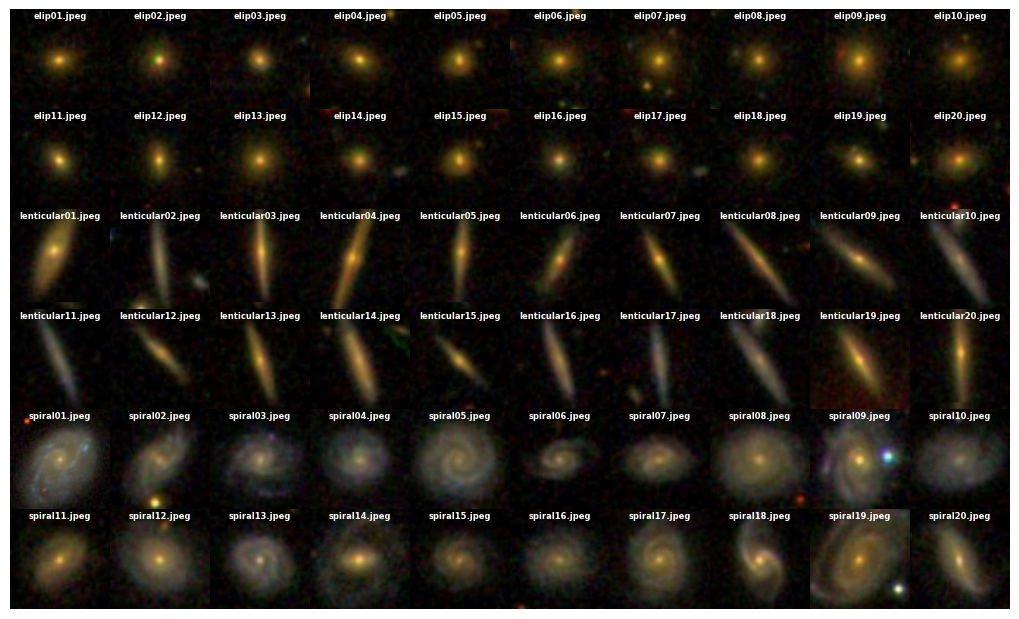

In [3]:
#Plotar minha biblioteca de imagens

# Diretório das imagens
base_dir = './galaxies'

# Lista de imagens no diretório
image_files = sorted(f for f in os.listdir(base_dir) if f.endswith('.jpeg'))  # Ordenar os arquivos

# Número de imagens
num_images = len(image_files)

# Calcular número de linhas e colunas para a grade
cols = 10  # Número de colunas
rows = (num_images + cols - 1) // cols  # Cálculo para garantir que todas as imagens se ajustem

# Criar uma figura para o plot
fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.0, rows * 1.0), gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.flatten()  # Transformar a matriz de eixos em uma lista

# Exibir cada imagem
for ax, image_file in zip(axes, image_files):
    image_path = os.path.join(base_dir, image_file)
    img = Image.open(image_path)
    ax.imshow(img, aspect='auto')
    ax.axis('off')  # Ocultar eixos
    ax.text(0.5, 0.98, image_file, ha='center', va='top', fontsize=6, color='white', weight='bold', transform=ax.transAxes)  # Nome do arquivo em branco

# Descartar eixos não utilizados
for ax in axes[len(image_files):]:
    ax.axis('off')

# Ajustar layout para remover qualquer espaço extra
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)

# Salvar a figura no mesmo diretório do projeto
output_path = './galaxy_grid.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
print(f"Imagem salva em {output_path}")

# Exibir a figura
plt.show()

In [4]:
#Converter .jpg em .pgm

def convert_jpeg_to_pgm(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Obter todos os arquivos .jpeg no diretório de entrada
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpeg'):
            jpeg_path = os.path.join(input_dir, filename)
            pgm_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '.pgm')
            
            # Abrir a imagem JPEG e convertê-la para escala de cinza
            with Image.open(jpeg_path) as img:
                img_gray = img.convert('L')  # Converte para escala de cinza
                img_gray.save(pgm_path, format='PPM')  # Salva como PGM
            
            print(f"Convertido {jpeg_path} para {pgm_path}")

# Diretório de entrada e saída
input_dir = './galaxies'
output_dir = './pgm_images'

# Converter as imagens
convert_jpeg_to_pgm(input_dir, output_dir)

Convertido ./galaxies/lenticular20.jpeg para ./pgm_images/lenticular20.pgm
Convertido ./galaxies/lenticular19.jpeg para ./pgm_images/lenticular19.pgm
Convertido ./galaxies/lenticular18.jpeg para ./pgm_images/lenticular18.pgm
Convertido ./galaxies/spiral02.jpeg para ./pgm_images/spiral02.pgm
Convertido ./galaxies/spiral15.jpeg para ./pgm_images/spiral15.pgm
Convertido ./galaxies/elip09.jpeg para ./pgm_images/elip09.pgm
Convertido ./galaxies/spiral08.jpeg para ./pgm_images/spiral08.pgm
Convertido ./galaxies/elip07.jpeg para ./pgm_images/elip07.pgm
Convertido ./galaxies/lenticular06.jpeg para ./pgm_images/lenticular06.pgm
Convertido ./galaxies/elip12.jpeg para ./pgm_images/elip12.pgm
Convertido ./galaxies/spiral06.jpeg para ./pgm_images/spiral06.pgm
Convertido ./galaxies/elip05.jpeg para ./pgm_images/elip05.pgm
Convertido ./galaxies/elip08.jpeg para ./pgm_images/elip08.pgm
Convertido ./galaxies/spiral03.jpeg para ./pgm_images/spiral03.pgm
Convertido ./galaxies/spiral14.jpeg para ./pgm_ima

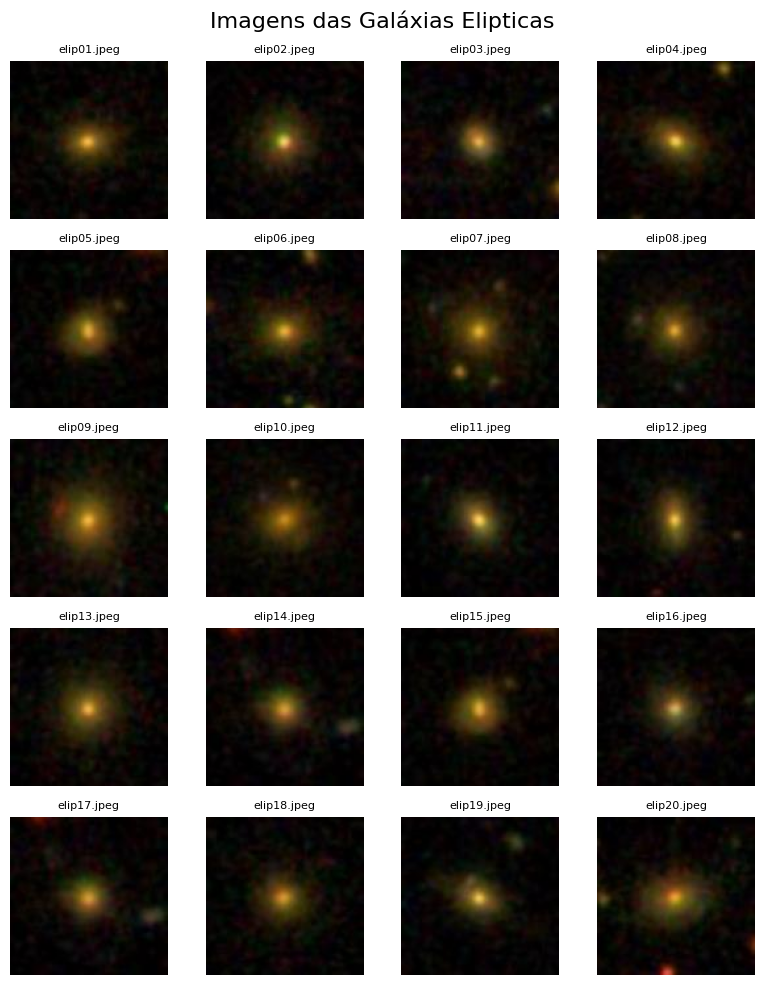

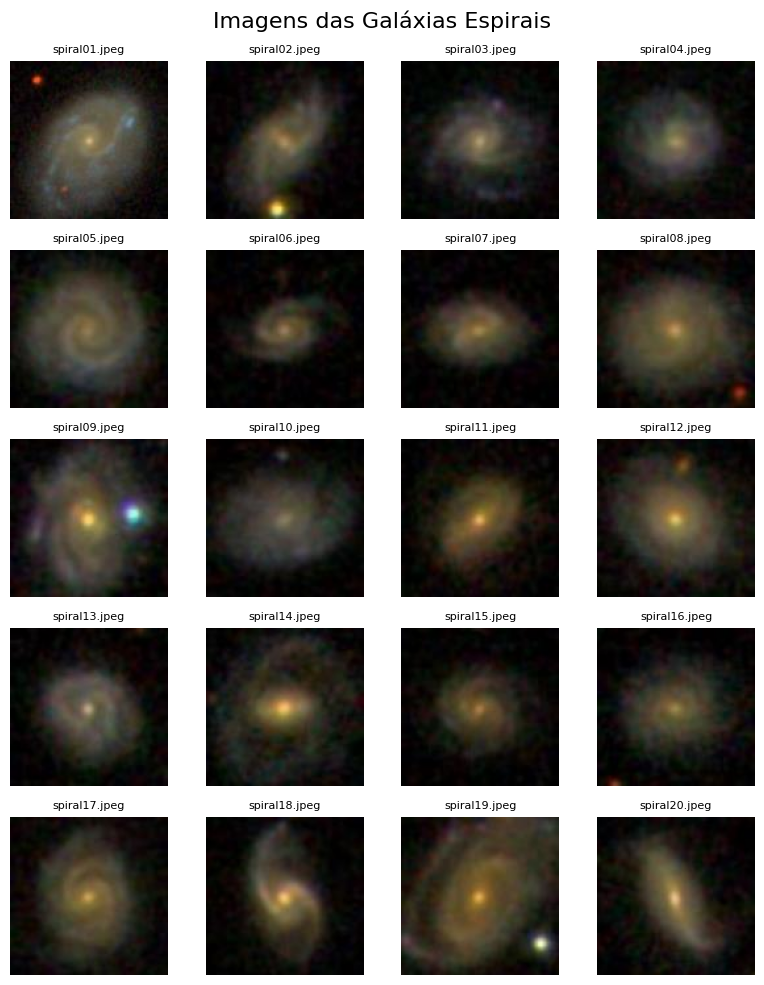

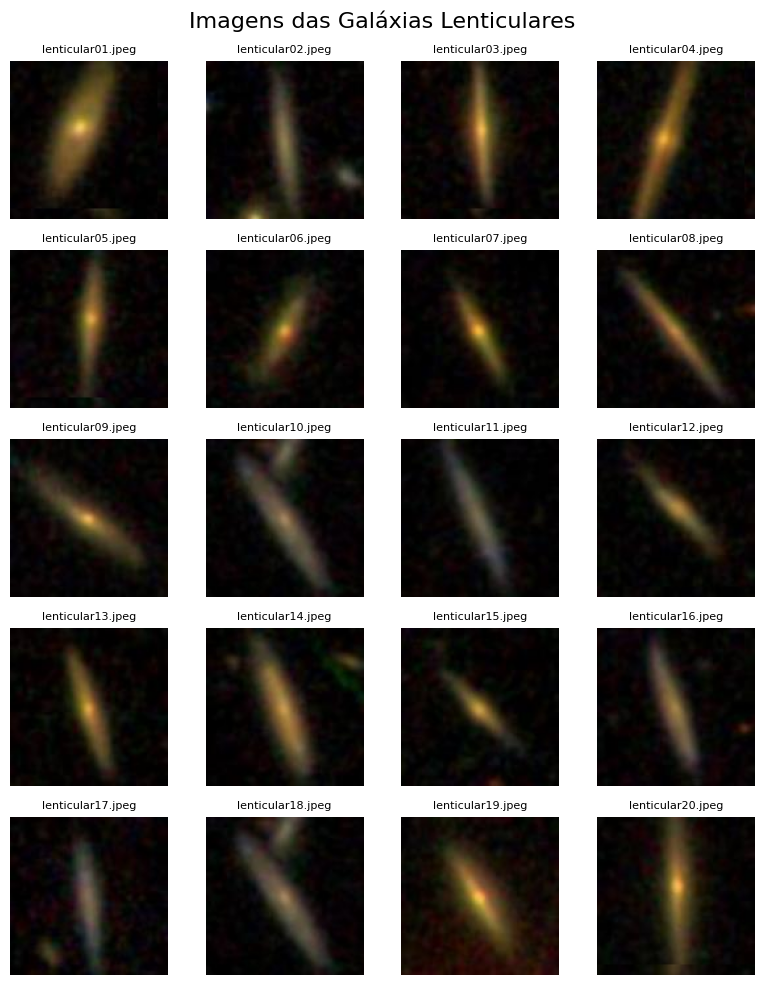

In [5]:
#plotar originais

import os
import matplotlib.pyplot as plt
from PIL import Image

# Diretório das imagens
base_dir = './galaxies'

# Lista de imagens no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.jpeg')]

# Separar imagens por tipo e ordenar
ellip_images = sorted([f for f in image_files if 'elip' in f])
spiral_images = sorted([f for f in image_files if 'spiral' in f])
barrada_images = sorted([f for f in image_files if 'lenticular' in f])


def plot_and_save_images(image_files, title, save_filename):
    # Número de imagens
    num_images = len(image_files)

    # Calcular número de linhas e colunas para a grade
    cols = 4  # Ajuste conforme necessário
    rows = (num_images + cols - 1) // cols  # Cálculo para garantir que todas as imagens se ajustem

    # Criar uma figura para o plot
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()  # Transformar a matriz de eixos em uma lista

    # Exibir cada imagem
    for ax, image_file in zip(axes, image_files):
        image_path = os.path.join(base_dir, image_file)
        img = Image.open(image_path)
        ax.imshow(img, cmap='gray')  # Usar cmap='gray' para manter a aparência original em escala de cinza
        ax.axis('off')  # Ocultar eixos
        ax.set_title(image_file, fontsize=8)  # Adicionar título com o nome da imagem

    # Descartar eixos não utilizados
    for ax in axes[len(image_files):]:
        ax.axis('off')

    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para garantir espaço para o título principal
    plt.suptitle(title, fontsize=16, y=0.98)  # Adicionar título principal

    # Salvar e mostrar a figura
    plt.savefig(save_filename)
    plt.show()  # Mostrar a figura na interface gráfica

# Plotar e salvar as imagens de cada tipo
plot_and_save_images(ellip_images, 'Imagens das Galáxias Elipticas', 'ellip_original_images.png')
plot_and_save_images(spiral_images, 'Imagens das Galáxias Espirais', 'spiral_original_images.png')
plot_and_save_images(barrada_images, 'Imagens das Galáxias Lenticulares', 'lenticular_original_images.png')


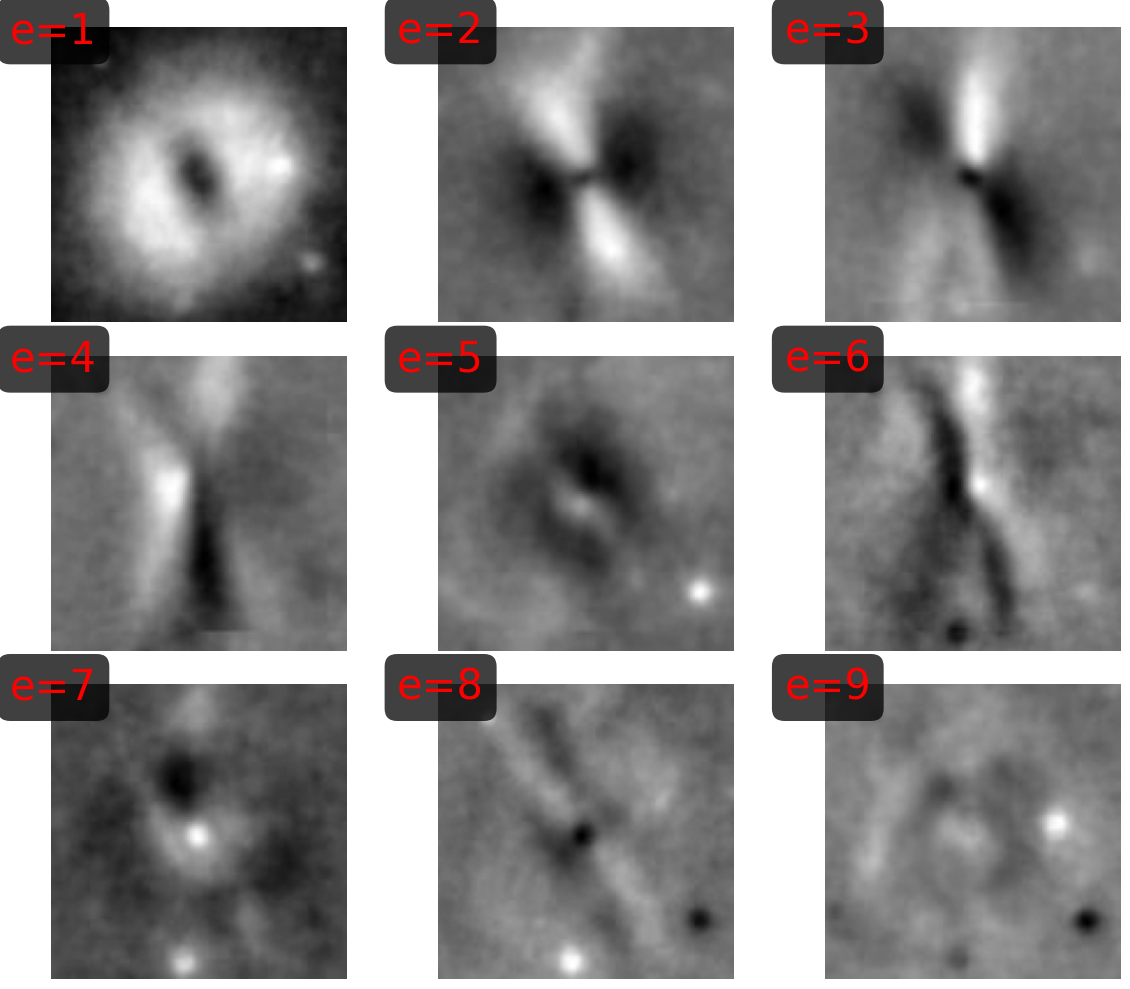

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Diretório das imagens de galáxias
base_dir = './pgm_images'

# Definir o tamanho da imagem
image_size = (128, 128)  # Ajuste conforme o tamanho das imagens de galáxias
image_shape = np.prod(image_size)  # Número total de pixels por imagem

# Inicializar a lista para armazenar as imagens
image_list = []

# Obter todos os arquivos de imagem no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.pgm')]  # Ajuste a extensão conforme necessário

for image_name in image_files:
    img_path = os.path.join(base_dir, image_name)
    img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
    img = img.resize(image_size)  # Redimensiona a imagem, se necessário
    img_array = np.array(img).flatten()  # Achata a imagem
    image_list.append(img_array)

# Verificar se a lista de imagens está vazia
if not image_list:
    raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes que podemos calcular
pca = PCA(n_components=n_components)
pca.fit(X)

# Visualizar as primeiras eigenfaces
def plot_eigenfaces(eigenvectors, image_shape, num_eigenfaces):
    num_cols = 3  # Número de colunas desejadas
    num_rows = (num_eigenfaces + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    plt.figure(figsize=(12, 10))  # Ajusta o tamanho da figura para acomodar as eigenfaces
    
    # Ajustar num_eigenfaces para o número de componentes disponíveis
    num_eigenfaces = min(num_eigenfaces, eigenvectors.shape[0])
    
    for i in range(num_eigenfaces):
        plt.subplot(num_rows, num_cols, i + 1)
        eigenface = eigenvectors[i].reshape(image_shape)
        plt.imshow(eigenface, cmap=plt.cm.gray)
        
        # Adicionar o quadrado preto com texto
        plt.text(
            0.5,  # Posição x do texto
            1.05,  # Posição y do texto (acima da imagem)
            f'e={i + 1}',  # Texto da legenda
            color='red',  # Cor do texto
            fontsize=30,  # Tamanho da fonte
            ha='center',  # Alinhamento horizontal
            va='center',  # Alinhamento vertical
            bbox=dict(facecolor='black', alpha=0.75, edgecolor='none', boxstyle='round,pad=0.3')  # Quadrado preto com arredondamento
        )
        
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plotar as 9 primeiras eigenfaces
plot_eigenfaces(pca.components_, image_size, num_eigenfaces=9)


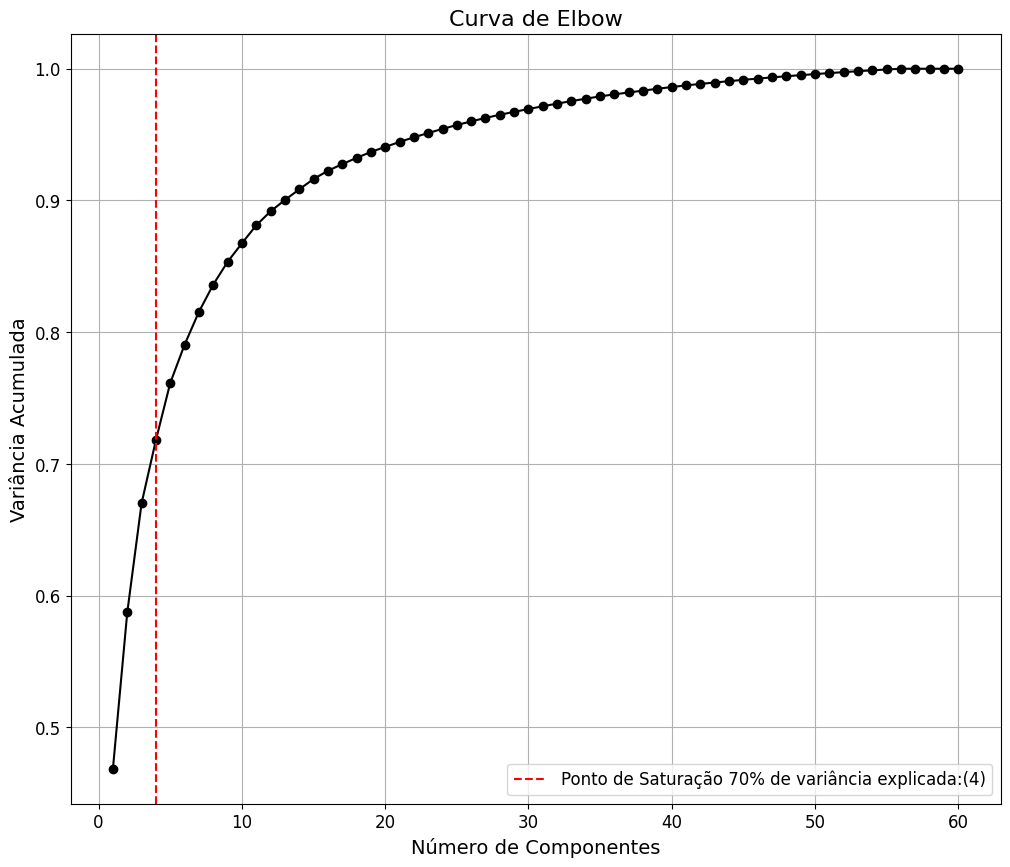

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Diretório das imagens de galáxias
base_dir = './pgm_images'

# Definir o tamanho da imagem
image_size = (128, 128)  # Ajuste conforme o tamanho das imagens de galáxias
image_shape = np.prod(image_size)  # Número total de pixels por imagem

# Inicializar a lista para armazenar as imagens
image_list = []

# Obter todos os arquivos de imagem no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.pgm')]  # Ajuste a extensão conforme necessário

for image_name in image_files:
    img_path = os.path.join(base_dir, image_name)
    img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
    img = img.resize(image_size)  # Redimensiona a imagem, se necessário
    img_array = np.array(img).flatten()  # Achata a imagem
    image_list.append(img_array)

# Verificar se a lista de imagens está vazia
if not image_list:
    raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes que podemos calcular
pca = PCA(n_components=n_components)
pca.fit(X)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Variância acumulada
cumulative_variance = np.cumsum(explained_variance)

# Encontrar o ponto de saturação (cotovelo)
threshold = 0.70  # Por exemplo, 90% de variância explicada
elbow_point = np.argmax(cumulative_variance >= threshold) + 1

# Plotar a Curva de Elbow
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='black', marker='o', linestyle='-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Ponto de Saturação 70% de variância explicada:({elbow_point})')

# Ajustes de estilo
plt.xlabel('Número de Componentes', fontsize=14)
plt.ylabel('Variância Acumulada', fontsize=14)
plt.title('Curva de Elbow', fontsize=16)

plt.legend(loc='best', fontsize=12)
plt.grid(True)  # Remove a grade do gráfico

# Ajustar tamanhos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Formato de X: (60, 16384)


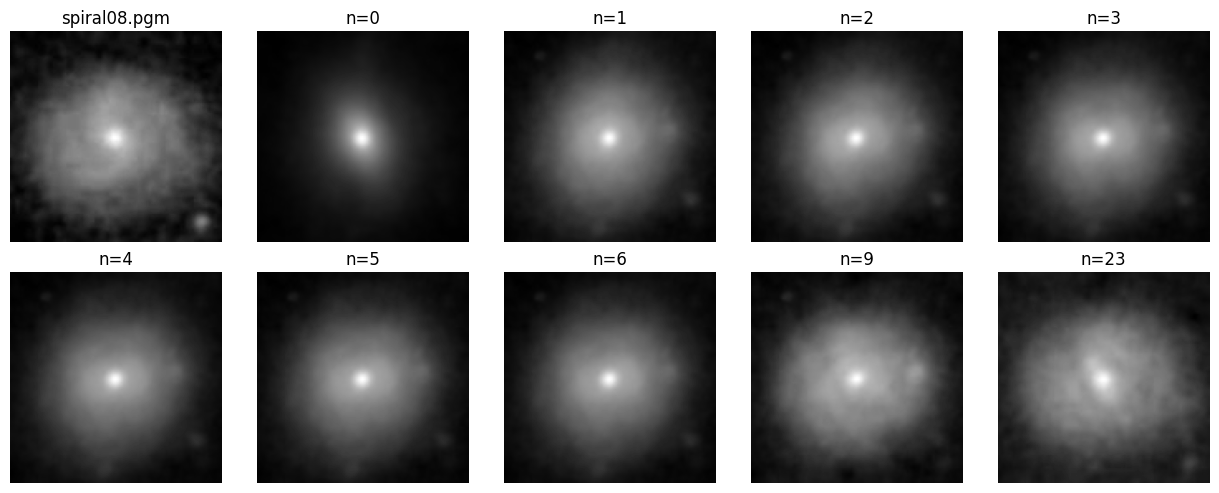

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Diretório das imagens de galáxias
base_dir = './pgm_images'

# Definir o tamanho da imagem
image_size = (128, 128)  # Ajuste conforme o tamanho das imagens de galáxias
image_shape = image_size  # Tamanho original da imagem

# Inicializar a lista para armazenar as imagens e nomes
image_list = []
image_names = []

# Obter todos os arquivos de imagem no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.pgm')]  # Ajuste a extensão conforme necessário

for image_name in image_files:
    img_path = os.path.join(base_dir, image_name)
    img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
    img = img.resize(image_size)  # Redimensiona a imagem, se necessário
    img_array = np.array(img).flatten()  # Achata a imagem
    image_list.append(img_array)
    image_names.append(image_name)

# Verificar se a lista de imagens está vazia
if not image_list:
    raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar o formato de X
print(f"Formato de X: {X.shape}")

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes que podemos calcular
pca = PCA(n_components=n_components)
pca.fit(X)

# Função para reconstruir uma imagem a partir dos componentes principais
def reconstruct_image(original_image, pca, r):
    # Projete a imagem original para o espaço dos componentes principais
    X_transformed = pca.transform([original_image])
    
    # Use apenas os primeiros r componentes principais
    X_reduced = X_transformed[:, :r]
    
    # Reconstruir a imagem usando os r componentes principais
    X_reconstructed = np.dot(X_reduced, pca.components_[:r, :]) + pca.mean_
    
    return X_reconstructed[0]

# Função para plotar imagens reconstruídas com diferentes valores de r
def plot_reconstructions(original_image, original_name, pca, image_shape, r_values):
    num_plots = len(r_values) + 1  # Total de imagens a serem exibidas
    num_cols = 5  # Número fixo de colunas
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    plt.figure(figsize=(num_cols * 2.5, num_rows * 2.5))  # Ajusta o tamanho da figura conforme o número de colunas e linhas
    
    # Plotar a imagem original
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(original_image.reshape(image_shape), cmap='gray')
    plt.title(f'{original_name}')
    plt.axis('off')
    
    # Plotar imagens reconstruídas
    for i, r in enumerate(r_values):
        if r > pca.n_components_:
            r = pca.n_components_  # Garante que r não exceda o número de componentes principais
        reconstructed_image = reconstruct_image(original_image, pca, r)
        
        plt.subplot(num_rows, num_cols, i + 2)  # Começa no segundo subplot
        plt.imshow(reconstructed_image.reshape(image_shape), cmap='gray')
        plt.title(f'n={r}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Escolher uma imagem para reconstrução
image_index = 8  # Índice da imagem para reconstrução
original_image = X[image_index]  # Pode ser qualquer imagem da lista
original_name = image_names[image_index]  # Nome da imagem

# Valores de r para a reconstrução
r_values = [0, 1, 2, 3, 4, 5, 6, 9, 23]

# Plotar reconstruções
plot_reconstructions(original_image, original_name, pca, image_size, r_values)


Projeções: (60, 10)
Labels: 60
Filenames: 60


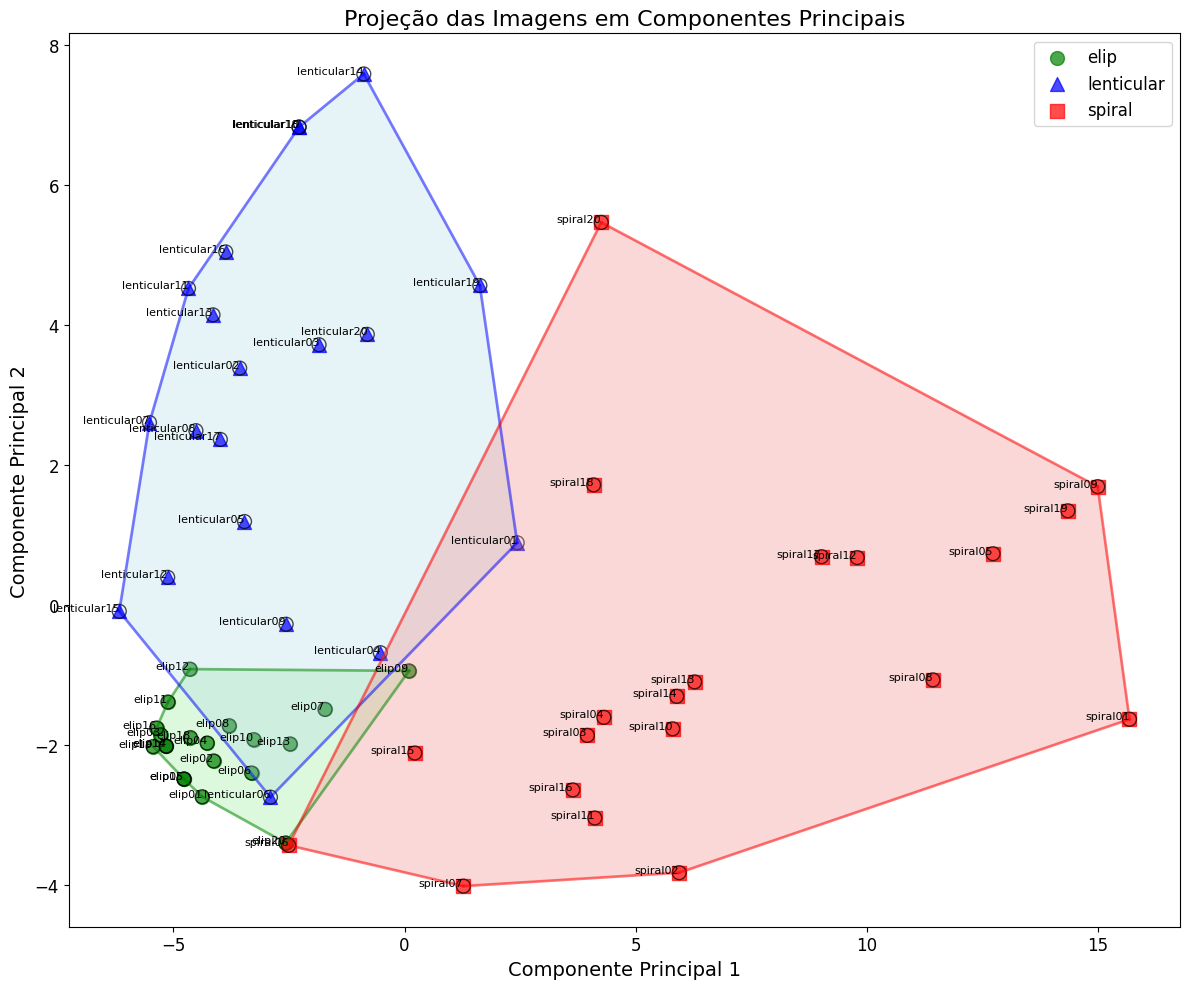

In [9]:
#PROJEÇÃO


import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    labels = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:
            img = rgb2gray(img)
        
        img_resized = resize(img, target_size, anti_aliasing=True)
        img_flattened = img_resized.flatten()
        images.append(img_flattened)
        
        if filename.startswith('elip'):
            labels.append('elip')
        elif filename.startswith('spiral'):
            labels.append('spiral')
        elif filename.startswith('lenticular'):  # Atualize para sua nova classe
            labels.append('lenticular')
        
        filenames.append(os.path.splitext(filename)[0])  # Nome do arquivo sem extensão
    
    return np.array(images), np.array(labels), filenames

# Função para carregar todas as imagens
def load_all_images(base_dir, target_size):
    images, labels, filenames = load_images_from_folder(base_dir, target_size)
    
    if images.size == 0:
        raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")
    
    return images, labels, filenames

# Função para projetar e plotar
def project_and_plot(images, pca, labels, filenames, pc_modes):
    avg_image = np.mean(images, axis=0)
    centered_images = images - avg_image
    projections = pca.transform(centered_images)
    
    print(f"Projeções: {projections.shape}")  # Debug: checar a forma das projeções
    print(f"Labels: {len(labels)}")  # Debug: checar a quantidade de labels
    print(f"Filenames: {len(filenames)}")  # Debug: checar a quantidade de filenames
    
    plt.figure(figsize=(12, 10))
    
    # Definir cores e marcadores
    colors = {'elip': 'green', 'spiral': 'red', 'lenticular': 'blue'}
    pastel_colors = {'elip': 'lightgreen', 'spiral': 'lightcoral', 'lenticular': 'lightblue'}
    markers = {'elip': 'o', 'spiral': 's', 'lenticular': '^'}
    
    # Verificar se o número de rótulos corresponde ao número de projeções
    assert len(labels) == projections.shape[0], "Número de rótulos não corresponde ao número de projeções."
    
    for label in np.unique(labels):
        idx = np.where(np.array(labels) == label)
        pts = projections[idx]
        
        # Desenha o convex hull se houver mais de 2 pontos
        if len(pts) > 2:
            hull = ConvexHull(pts[:, [pc_modes[0], pc_modes[1]]])
            for simplex in hull.simplices:
                plt.plot(pts[simplex, pc_modes[0]], pts[simplex, pc_modes[1]], 
                         color=colors[label], alpha=0.5, lw=2)  # Linha do contorno
            
            # Preenchimento da área do convex hull com cor pastel
            plt.fill(pts[hull.vertices, pc_modes[0]], 
                     pts[hull.vertices, pc_modes[1]], 
                     color=pastel_colors[label], alpha=0.3)
        
        plt.scatter(pts[:, pc_modes[0]], pts[:, pc_modes[1]], 
                    c=colors[label], marker=markers[label], label=label, alpha=0.7, s=100)
        
        # Adiciona contorno aos pontos
        plt.scatter(pts[:, pc_modes[0]], pts[:, pc_modes[1]], 
                    edgecolor='black', facecolor='none', s=100, alpha=0.7)
    
    # Adicionar nomes dos arquivos
    for i, filename in enumerate(filenames):
        plt.text(projections[i, pc_modes[0]], projections[i, pc_modes[1]], filename,
                 fontsize=8, ha='right', color='black')

    # Ajustes de estilo
    plt.xlabel(f'Componente Principal {pc_modes[0] + 1}', fontsize=14)
    plt.ylabel(f'Componente Principal {pc_modes[1] + 1}', fontsize=14)
    plt.title('Projeção das Imagens em Componentes Principais', fontsize=16)
    
    plt.legend(loc='best', fontsize=12)
    plt.grid(False)  # Remove a grade do gráfico
    
    # Ajustar tamanhos dos eixos
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, labels, filenames = load_all_images(base_dir, target_size)

# Ajustar PCA
pca = PCA(n_components=10)
avg_image = np.mean(images, axis=0)
centered_images = images - avg_image
pca.fit(centered_images)

# Componentes principais a serem usadas (0-indexado, então PC1 e PC2 são 0 e 1)
pc_modes = [0, 1]  # Ajuste conforme necessário

# Projeção e plotagem
project_and_plot(images, pca, labels, filenames, pc_modes)


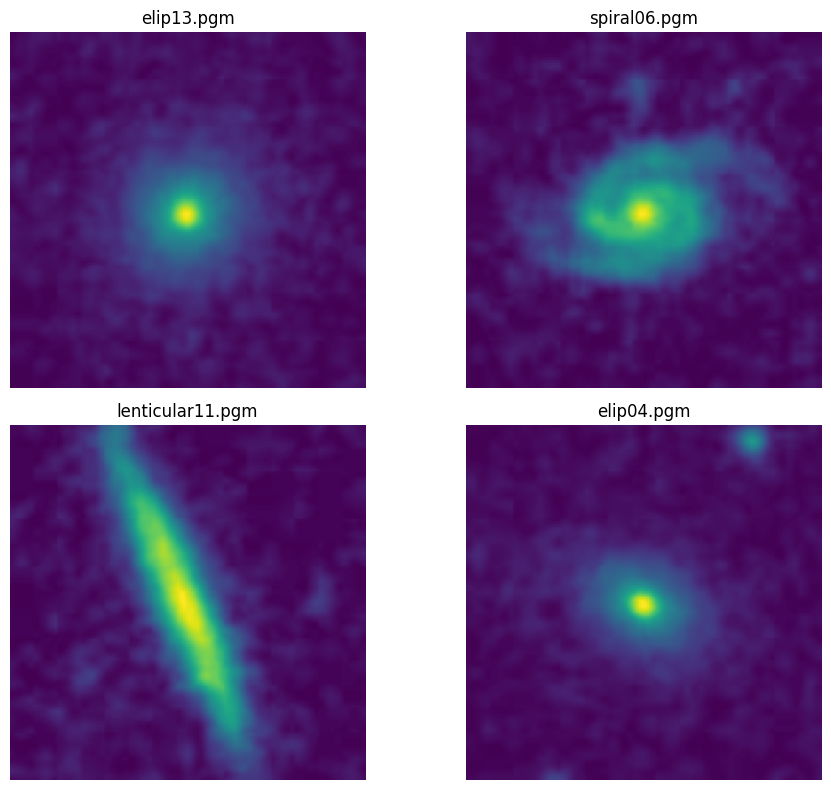

In [10]:
#plota especifico
# 
# # Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:
            img = rgb2gray(img)
        
        img_resized = resize(img, target_size, anti_aliasing=True)
        img_flattened = img_resized.flatten()
        images.append(img_flattened)
        
        filenames.append(os.path.splitext(filename)[0])  # Nome do arquivo sem extensão
    
    return np.array(images), filenames

# Função para plotar imagens específicas
def plot_specific_images(images, filenames, specific_files, target_size):
    plt.figure(figsize=(10, 8))
    
    for i, file in enumerate(specific_files):
        if file in filenames:
            idx = filenames.index(file)
            img = images[idx].reshape(*target_size)
            plt.subplot(2, 2, i + 1)
            plt.imshow(img, cmap='viridis')
            plt.title(f'{file}.pgm')
            plt.axis('off')
        else:
            plt.subplot(2, 2, i + 1)
            plt.text(0.5, 0.5, f'{file}.pgm\nNot Found', 
                     ha='center', va='center', fontsize=12, color='red')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, filenames = load_images_from_folder(base_dir, target_size)

# Arquivos específicos a serem plotados
specific_files = ['elip13', 'spiral06', 'lenticular11', 'elip04']

# Plotar imagens específicas
plot_specific_images(images, filenames, specific_files, target_size)

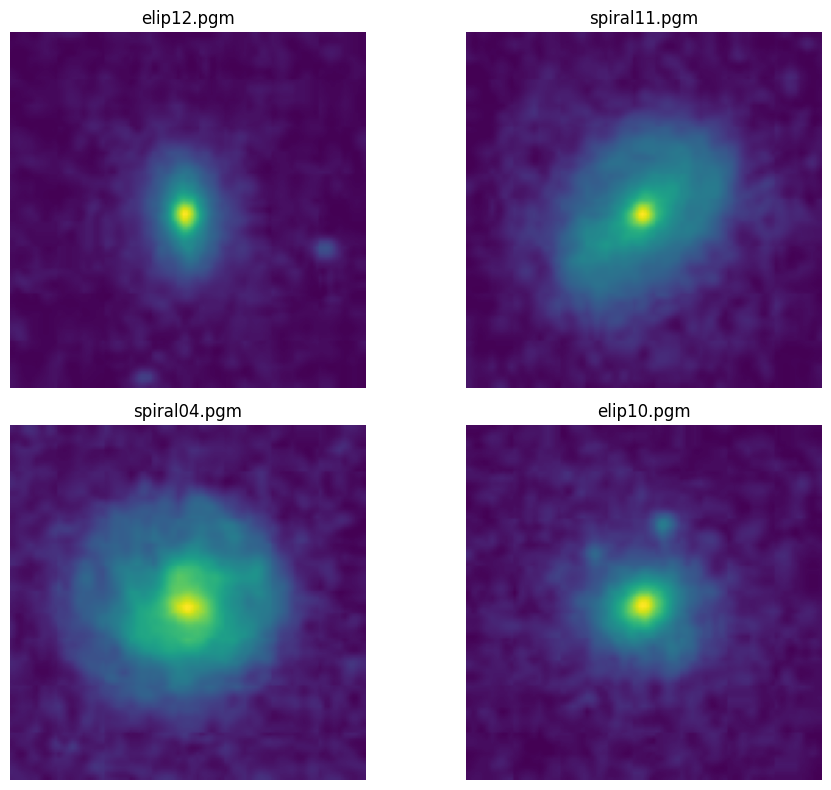

In [11]:
#plota especifico

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

# Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        
        # Verifica se a imagem é colorida e não a converte para escala de cinza
        if img.ndim == 3:
            img_resized = resize(img, target_size, anti_aliasing=True)
        else:
            # Caso a imagem seja em escala de cinza, redimensiona sem conversão
            img_resized = resize(img, target_size, anti_aliasing=True)
        
        img_flattened = img_resized.flatten()
        images.append(img_resized)
        
        filenames.append(os.path.splitext(filename)[0])  # Nome do arquivo sem extensão
    
    return np.array(images), filenames

# Função para plotar imagens específicas
def plot_specific_images(images, filenames, specific_files, target_size):
    plt.figure(figsize=(10, 8))
    
    for i, file in enumerate(specific_files):
        if file in filenames:
            idx = filenames.index(file)
            img = images[idx]  # Usa a imagem colorida ou em escala de cinza redimensionada
            plt.subplot(2, 2, i + 1)
            plt.imshow(img)  # Não especifica cmap para manter as cores originais
            plt.title(f'{file}.pgm')
            plt.axis('off')
        else:
            plt.subplot(2, 2, i + 1)
            plt.text(0.5, 0.5, f'{file}.pgm\nNot Found', 
                     ha='center', va='center', fontsize=12, color='red')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, filenames = load_images_from_folder(base_dir, target_size)

# Arquivos específicos a serem plotados
specific_files = ['elip12', 'spiral11', 'spiral04', 'elip10']

# Plotar imagens específicas
plot_specific_images(images, filenames, specific_files, target_size)

/tmp/ipykernel_5704/3451210445.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)  # Usar um mapa de cores distinto para cada classe


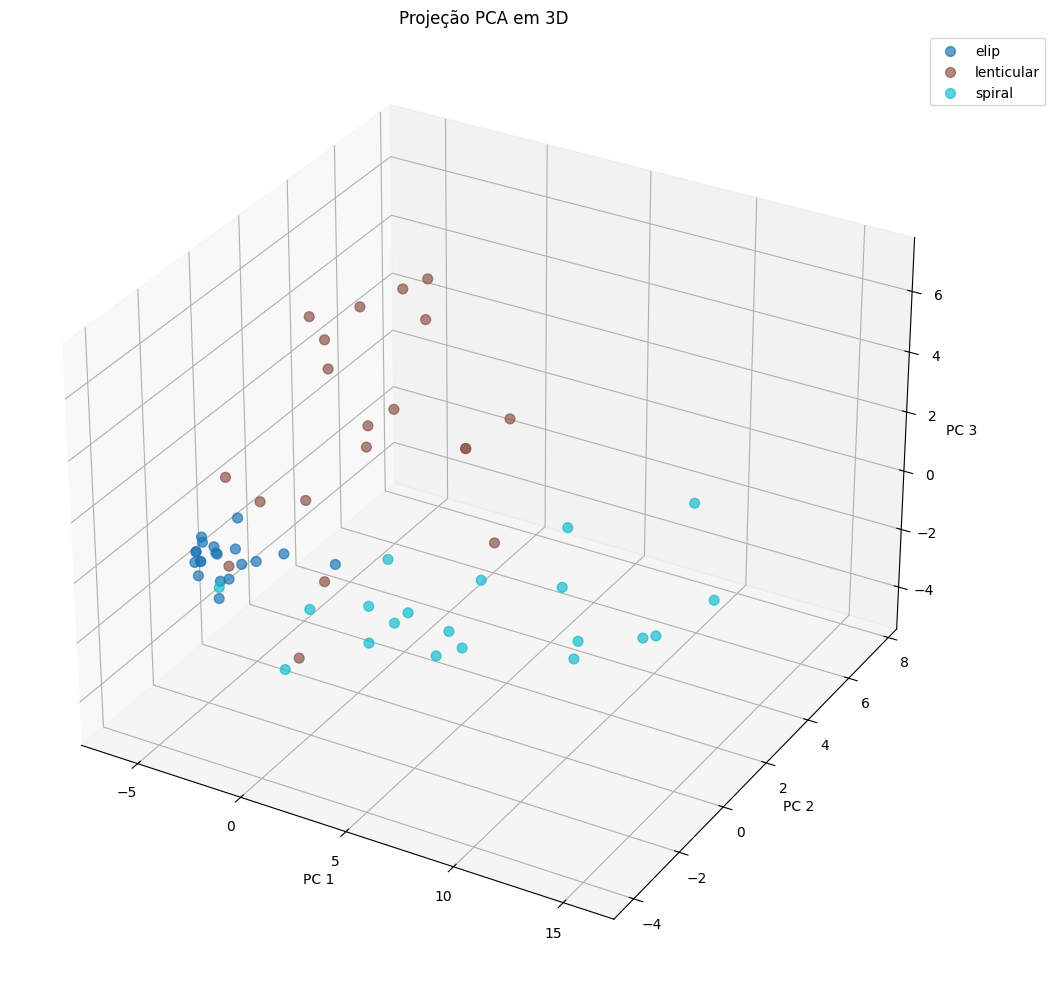

In [12]:
#plota 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.decomposition import PCA

# Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    labels = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:
            img = rgb2gray(img)
        
        img_resized = resize(img, target_size, anti_aliasing=True)
        img_flattened = img_resized.flatten()
        images.append(img_flattened)
        
        if filename.startswith('elip'):
            labels.append('elip')
        elif filename.startswith('spiral'):
            labels.append('spiral')
        elif filename.startswith('lenticular'):  # Adicione a nova classe
            labels.append('lenticular')
        
        filenames.append(os.path.splitext(filename)[0])  # Nome do arquivo sem extensão
    
    return np.array(images), np.array(labels), filenames

# Função para plotar PCA em 3D
def plot_pca_3d(pca_data, labels):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Número de classes
    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)
    colors = plt.cm.get_cmap('tab10', num_classes)  # Usar um mapa de cores distinto para cada classe

    # Plotar os dados com cores diferentes
    for i, label in enumerate(unique_labels):
        mask = labels == label
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1], pca_data[mask, 2], 
                   color=colors(i),  # Usar o índice do label
                   label=label, marker='o', s=50, alpha=0.7)  # Tamanho e transparência

    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_title('Projeção PCA em 3D')

    # Adiciona a legenda
    ax.legend(loc='best', bbox_to_anchor=(1.1, 1))

    # Melhorar o layout
    plt.tight_layout()
    plt.show()

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, labels, _ = load_images_from_folder(base_dir, target_size)

# Ajustar PCA para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(images)

# Plotar as componentes principais em 3D
plot_pca_3d(X_pca, labels)

In [13]:
#Calcular distancia euclidiana
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import os
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    labels = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        if img.ndim == 3:
            img = rgb2gray(img)
        
        img_resized = resize(img, target_size, anti_aliasing=True)
        img_flattened = img_resized.flatten()
        images.append(img_flattened)
        
        if filename.startswith('elip'):
            labels.append('elip')
        elif filename.startswith('spiral'):
            labels.append('spiral')
        elif filename.startswith('lenticular'):  # Adicionando a nova classe
            labels.append('lenticular')
    
    return np.array(images), np.array(labels)

# Função para calcular os centroides das classes
def compute_class_centroids(X_pca, labels):
    centroids = []
    unique_labels = np.unique(labels)
    for label in unique_labels:
        class_data = X_pca[labels == label]
        centroid = np.mean(class_data, axis=0)
        centroids.append(centroid)
    return np.array(centroids), unique_labels

# Função para calcular distâncias entre centroides
def calculate_distances_between_centroids(centroids):
    return euclidean_distances(centroids, centroids)

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, labels = load_images_from_folder(base_dir, target_size)

# Aplicar PCA para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(images)

# Calcular distâncias entre todos os pontos
distances = euclidean_distances(X_pca, X_pca)

# Calcular centroides e distâncias entre centroides
centroids, unique_labels = compute_class_centroids(X_pca, labels)
centroid_distances = calculate_distances_between_centroids(centroids)

# Exibir algumas distâncias
print("Distâncias entre todos os pontos:")
print(distances)

print("\nDistâncias entre centroides das classes:")
for i, label in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i != j:
            print(f"Distância entre centroides de {label} e {label2}: {centroid_distances[i, j]:.2f}")

print("\nMatriz de distâncias entre centroides:")
print(centroid_distances)

Distâncias entre todos os pontos:
[[ 0.          0.73552064  1.35978336 ...  9.67149408 19.48099671
  12.09515239]
 [ 0.73552064  0.          1.20786347 ...  9.30900926 19.06025837
  11.66883299]
 [ 1.35978336  1.20786347  0.         ... 10.20809776 20.10621482
  12.30262832]
 ...
 [ 9.67149408  9.30900926 10.20809776 ...  0.         11.39212442
   3.81657147]
 [19.48099671 19.06025837 20.10621482 ... 11.39212442  0.
  12.27742816]
 [12.09515239 11.66883299 12.30262832 ...  3.81657147 12.27742816
   0.        ]]

Distâncias entre centroides das classes:
Distância entre centroides de elip e lenticular: 5.13
Distância entre centroides de elip e spiral: 10.83
Distância entre centroides de lenticular e elip: 5.13
Distância entre centroides de lenticular e spiral: 10.31
Distância entre centroides de spiral e elip: 10.83
Distância entre centroides de spiral e lenticular: 10.31

Matriz de distâncias entre centroides:
[[ 0.          5.13294868 10.82898524]
 [ 5.13294868  0.         10.31493588

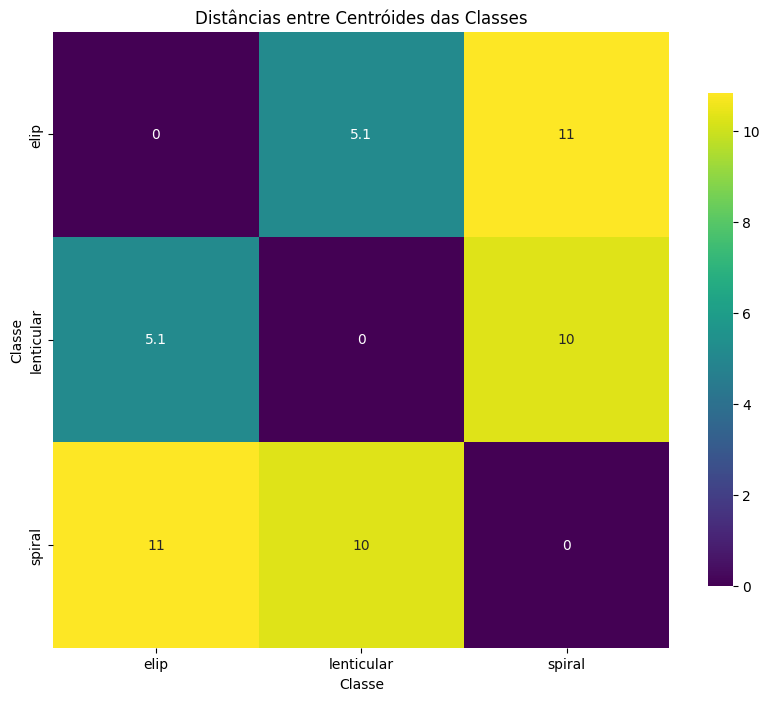

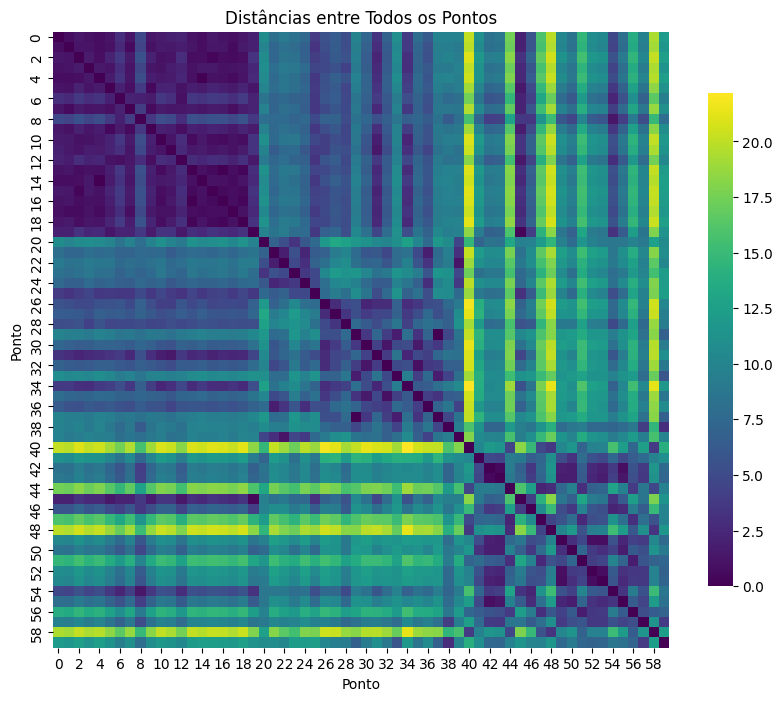

In [14]:
#distancia entre todos os pontos

import matplotlib.pyplot as plt
import seaborn as sns

# Plotar matriz de distâncias entre centroides das classes
plt.figure(figsize=(10, 8))
sns.heatmap(centroid_distances, cmap='viridis', annot=True, square=True, cbar_kws={'shrink': .8})
plt.title('Distâncias entre Centróides das Classes')
plt.xlabel('Classe')
plt.ylabel('Classe')
plt.xticks(ticks=np.arange(len(unique_labels)) + 0.5, labels=unique_labels)
plt.yticks(ticks=np.arange(len(unique_labels)) + 0.5, labels=unique_labels)
plt.show()

# Plotar matriz de distâncias entre todos os pontos
plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='viridis', square=True, cbar_kws={'shrink': .8})
plt.title('Distâncias entre Todos os Pontos')
plt.xlabel('Ponto')
plt.ylabel('Ponto')
plt.show()



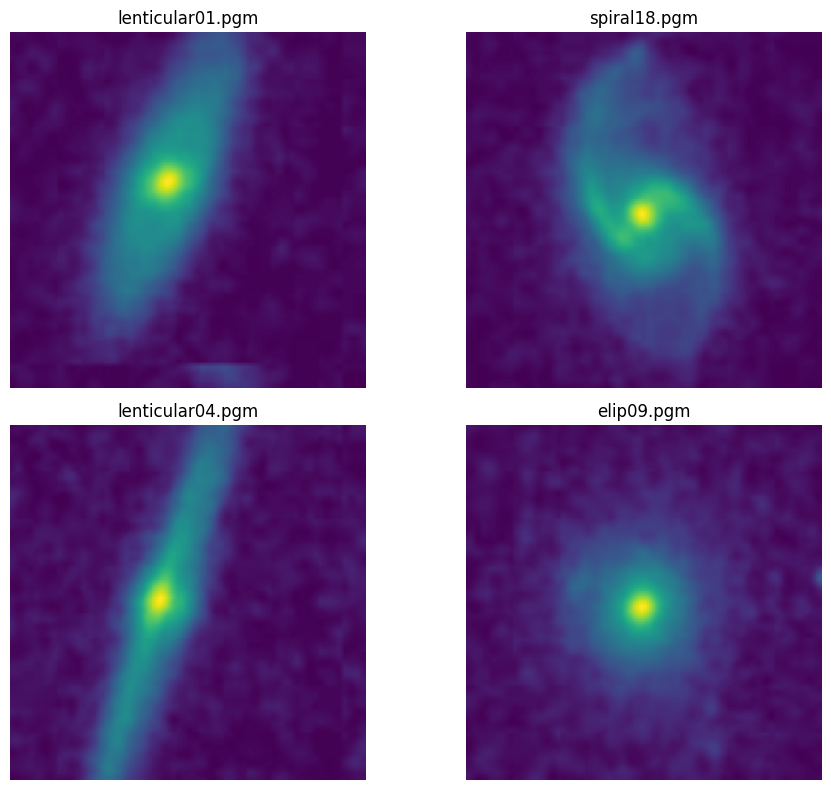

In [15]:
#plota especifico

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

# Diretório das imagens
base_dir = './pgm_images'

# Função para carregar e redimensionar imagens de uma pasta
def load_images_from_folder(folder, target_size):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        
        # Verifica se a imagem é colorida e não a converte para escala de cinza
        if img.ndim == 3:
            img_resized = resize(img, target_size, anti_aliasing=True)
        else:
            # Caso a imagem seja em escala de cinza, redimensiona sem conversão
            img_resized = resize(img, target_size, anti_aliasing=True)
        
        img_flattened = img_resized.flatten()
        images.append(img_resized)
        
        filenames.append(os.path.splitext(filename)[0])  # Nome do arquivo sem extensão
    
    return np.array(images), filenames

# Função para plotar imagens específicas
def plot_specific_images(images, filenames, specific_files, target_size):
    plt.figure(figsize=(10, 8))
    
    for i, file in enumerate(specific_files):
        if file in filenames:
            idx = filenames.index(file)
            img = images[idx]  # Usa a imagem colorida ou em escala de cinza redimensionada
            plt.subplot(2, 2, i + 1)
            plt.imshow(img)  # Não especifica cmap para manter as cores originais
            plt.title(f'{file}.pgm')
            plt.axis('off')
        else:
            plt.subplot(2, 2, i + 1)
            plt.text(0.5, 0.5, f'{file}.pgm\nNot Found', 
                     ha='center', va='center', fontsize=12, color='red')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Definir o tamanho esperado das imagens
target_size = (128, 128)

# Carregar imagens
images, filenames = load_images_from_folder(base_dir, target_size)

# Arquivos específicos a serem plotados
specific_files = ['lenticular01', 'spiral18', 'lenticular04', 'elip09']

# Plotar imagens específicas
plot_specific_images(images, filenames, specific_files, target_size)